### NAME: BUSHRA HOSSAIN
### IternID: i23b0034s26
##### Day: 7
##### Task: 2

In [15]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
import psycopg2.extras

class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

con = PostgresConnection().getConnection()

Connection to DB established!


## Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt= """ 
                select s.division,sum(t.total_price)
                from ecomdb.fact_table t
                join ecomdb.store_dim s on s.store_key=t.store_key
                group by cube(s.division)
                order by s.division
"""
cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


In [9]:
records


[('Barishal', 917117.25),
 ('Chittagong', 719230.0),
 ('Dhaka', 4640743.5),
 ('Khulna', 1006215.5),
 ('Mymensingh', 820235.0),
 ('Rajshahi', 1137256.0),
 ('Rangpur', 967796.75),
 ('Sylhet', 1241738.75),
 (None, 11450332.75)]

In [10]:
df1= pd.DataFrame(records, columns=['division','sales'])
df1

division        sales
0    Barishal    917117.25
1  Chittagong    719230.00
2       Dhaka   4640743.50
3      Khulna   1006215.50
4  Mymensingh    820235.00
5    Rajshahi   1137256.00
6     Rangpur    967796.75
7      Sylhet   1241738.75
8        None  11450332.75

In [11]:
df1=df1.drop(8)

In [12]:
df1

division       sales
0    Barishal   917117.25
1  Chittagong   719230.00
2       Dhaka  4640743.50
3      Khulna  1006215.50
4  Mymensingh   820235.00
5    Rajshahi  1137256.00
6     Rangpur   967796.75
7      Sylhet  1241738.75

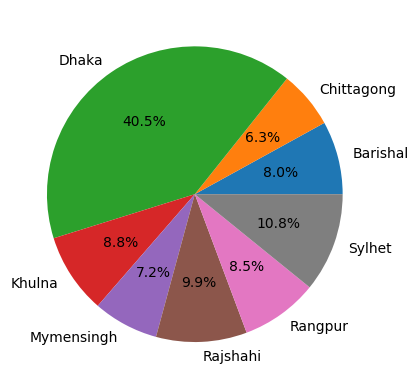

In [18]:
plt.pie(df1['sales'], labels=df1['division'], autopct='%1.1f%%')
plt.show()

## Q1: Find the year wise total_sale_price joining fact table and respective dimension table 

In [20]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT tdim.year, SUM(t.total_price) AS total_sale_pric
    FROM ecomdb.fact_table t
    JOIN ecomdb.time_dim tdim ON tdim.time_key = t.time_key
    GROUP BY tdim.year
    ORDER BY tdim.year
"""
cur.execute(select_stmt)
records = cur.fetchall()


Connection to DB established!


In [24]:
df = pd.DataFrame(records, columns=['Year', 'Total Sale Price'])
df

Year  Total Sale Price
0  2014         960383.25
1  2015        1235760.50
2  2016        1400831.25
3  2017        1196303.50
4  2018        1183091.75
5  2019        1515285.50
6  2020        1585573.50
7  2021        1265087.75
8  2022        1108015.75

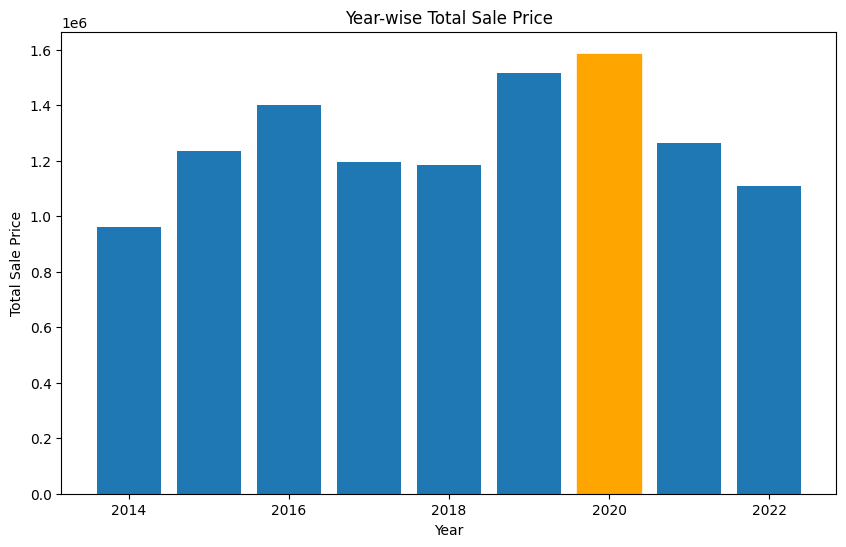

In [27]:
max_index = df['Total Sale Price'].idxmax()
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Year'], df['Total Sale Price'])

bars[max_index].set_color('orange')

plt.xlabel('Year')
plt.ylabel('Total Sale Price')
plt.title('Year-wise Total Sale Price')
plt.show()

###  Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [32]:
##Customer wise total sale price
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT c.name, SUM(t.total_price) AS total_sale_price
    FROM ecomdb.fact_table t
    JOIN ecomdb.customer_dim c ON c.customer_key = t.customer_key
    GROUP BY c.name
    ORDER BY c.name
"""
cur.execute(select_stmt)
records = cur.fetchall()


Connection to DB established!


In [33]:
records

[('aaftaab husan', 18565.0),
 ('aakanksha', 3772.5),
 ('aamir', 1186.5),
 ('aamir hussain', 1955.25),
 ('aamod & pramod', 993.0),
 ('aanamika misra', 952.0),
 ('aaradhana @ priyanka', 2354.25),
 ('aarti', 56363.5),
 ('aarti @ noni', 35920.0),
 ('aarti devi', 1074.25),
 ('aasish  kumar', 853.0),
 ('aasmin', 2665.0),
 ('aasto', 1547.75),
 ('aayana', 1988.0),
 ('aaysha', 28739.25),
 ('abbas', 6740.0),
 ('abdul kadir', 26734.0),
 ('abhay', 8156.0),
 ('abhijeet', 26254.5),
 ('abhimanyu', 5707.75),
 ('abhinav chaudhary', 374.0),
 ('abhinav vashit', 540.0),
 ('abhishek', 84.0),
 ('abhishekh', 79851.0),
 ('adersen', 20111.0),
 ('aditya negi', 494.5),
 ('aditya som', 2083.5),
 ('adnan', 5742.0),
 ('afridi', 1020.0),
 ('afrin', 3906.0),
 ('afsana', 6117.5),
 ('ahsamin @ juhi', 6428.5),
 ('ajahar', 22130.25),
 ('ajay', 9758.25),
 ('ajay haldar', 1913.5),
 ('ajay kumar', 28792.0),
 ('ajay narayan', 2981.75),
 ('ajit', 1048.0),
 ('akansha', 27968.0),
 ('akash', 3438.0),
 ('akash gupta', 9374.5),
 (

In [ ]:
df = pd.DataFrame(records, columns=['Customer', 'Total Sale Price'])

sns.violinplot(x=df['Total Sale Price'], y=df['Customer'], hue=df['Customer'], palette='viridis', inner='quartile', split=True, legend=False)
plt.xlabel('Total Sale Price')
plt.ylabel('Customer')
plt.title('Customer-wise Total Sale Price (Violin Plot)')
plt.show()

### Q2: Find the transaction(cash/online) wise total_sale_price joining fact table and respective trans_dim table 

In [41]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT td.trans_type, SUM(t.total_price) AS total_sale_price
    FROM ecomdb.fact_table t
    JOIN ecomdb.trans_dim td ON td.payment_key = t.payment_key
    GROUP BY td.trans_type
    ORDER BY td.trans_type
"""
cur.execute(select_stmt)
records = cur.fetchall()


Connection to DB established!


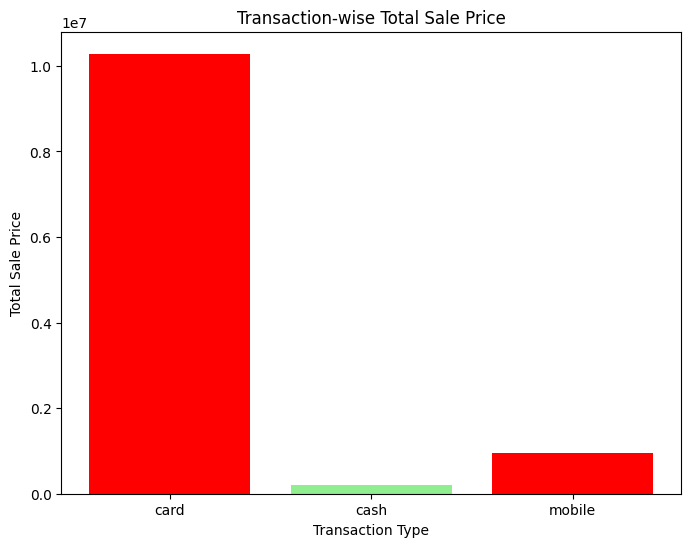

In [43]:
df = pd.DataFrame(records, columns=['Transaction Type', 'Total Sale Price'])

plt.figure(figsize=(8, 6))
plt.bar(df['Transaction Type'], df['Total Sale Price'], color=['red', 'lightgreen'])
plt.xlabel('Transaction Type')
plt.ylabel('Total Sale Price')
plt.title('Transaction-wise Total Sale Price')
plt.show()

### Q3: Total sales in Barishal compared with other divisions total sales

In [66]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT SUM(t.total_price) AS total_sale_price
    FROM ecomdb.fact_table t
    JOIN ecomdb.time_dim td ON td.time_key = t.time_key
    WHERE td.year = 2015
"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


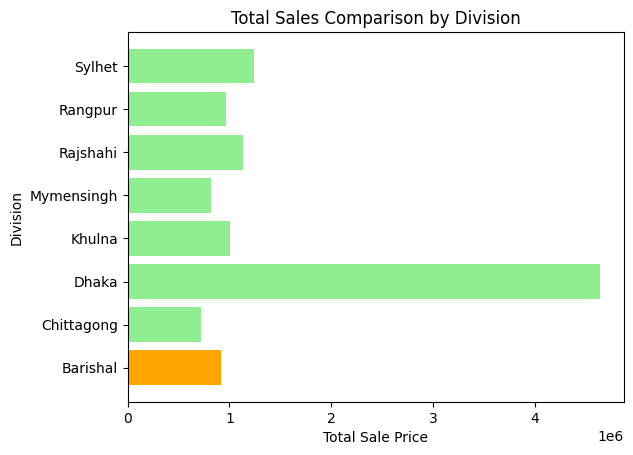

In [65]:
 df = pd.DataFrame(records, columns=['Division', 'Total Sale Price'])

df

colors = ['orange' if division == 'Barishal' else 'lightgreen' for division in df['Division']]
plt.barh(df['Division'], df['Total Sale Price'], color=colors)
plt.xlabel('Total Sale Price')
plt.ylabel('Division')
plt.title('Total Sales Comparison by Division')
plt.show()

In [67]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT SUM(t.total_price) AS total_sale_price
    FROM ecomdb.fact_table t
    JOIN ecomdb.time_dim td ON td.time_key = t.time_key
    WHERE td.year = 2015
"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [74]:
records

[(1235760.5,)]

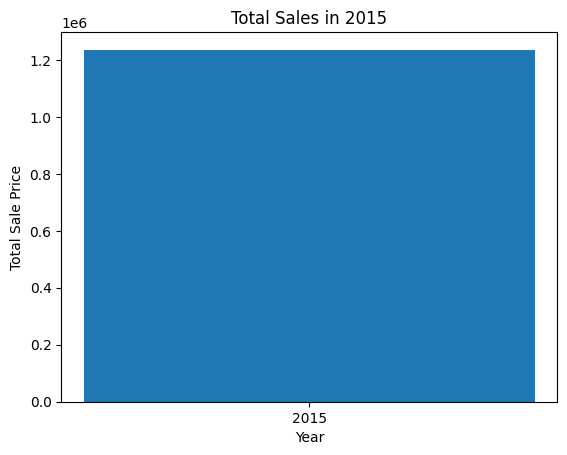

In [77]:
total_sales_2015 = records[0][0] if records and records[0] else 0
total_sales_2015

plt.bar(['2015'], [total_sales_2015])
plt.xlabel('Year')
plt.ylabel('Total Sale Price')
plt.title('Total Sales in 2015')
plt.show()


#### Q5: Total sales of Dhaka in 2015



In [78]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = """ 
    SELECT SUM(t.total_price) AS total_sale_price
    FROM ecomdb.fact_table t
    JOIN ecomdb.store_dim s ON s.store_key = t.store_key
    JOIN ecomdb.time_dim td ON td.time_key = t.time_key
    WHERE s.division = 'Dhaka' AND td.year = 2015
"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [81]:
total_sales_dhaka_2015 = records[0][0] if records and records[0] else 0

total_sales_dhaka_2015



533128.75

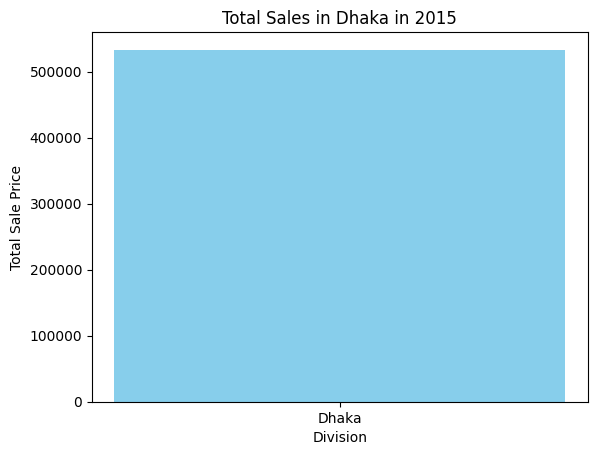

In [82]:
plt.bar(['Dhaka'], [total_sales_dhaka_2015], color='skyblue')
plt.xlabel('Division')
plt.ylabel('Total Sale Price')
plt.title('Total Sales in Dhaka in 2015')
plt.show()

#### 
Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [119]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    s.store_key AS store,
    i.item_name AS product,
    COUNT(f.total_price) AS total_quantity_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.item_dim i ON f.item_key = i.item_key
WHERE
    i.item_name IS NOT NULL
GROUP BY
    s.store_key, i.item_name
ORDER BY
    store, total_quantity_sales DESC;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [120]:
records

[('S0001', 'Sprite - 12 oz cans', 6),
 ('S0001', 'Waterloo Sparkling Mango 12oz', 5),
 ('S0001', 'Austin Toasty Crackers w/ PBtr', 4),
 ('S0001', 'Nature Valley Chewy Trail Mix Bars', 3),
 ('S0001', 'Hefty Supreme Foam Bowls 12oz', 3),
 ('S0001', 'Advil 2 pill packets', 3),
 ('S0001', 'K Cups Folgers Lively Columbian', 3),
 ('S0001', 'Hefty Supreme Foam Plates 9 inch', 3),
 ('S0001', 'Paper Plates 7 inch  Ultra Strong', 3),
 ('S0001', 'Waterloo Sparkling Lemon 12oz', 3),
 ('S0001', 'Gatorade Liberty Variety 12 oz', 3),
 ('S0001', 'K Cups Daily Chef Columbian Supremo', 3),
 ('S0001', 'Gatorade Lemon Lime 12oz', 3),
 ('S0001', 'Goldfish Variety Bags, cheddar, pretzels', 3),
 ('S0001', 'Ice Breaker Mints Sugar Free ', 3),
 ('S0001', 'Spunkmeyer Muffin Variety', 3),
 ('S0001', 'Hand Sanitizer Refill Pump', 3),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', 3),
 ('S0001', 'Njoy Sugar Canister 22 oz', 3),
 ('S0001', 'Dasani Bottled Water 16.9 oz', 3),
 ('S0001', 'Waterloo Sparkling Grapefruit

In [121]:
df = pd.DataFrame(records, columns=['Store', 'Product', 'Total Quantity Sales'])

df

Store                             Product  Total Quantity Sales
0     S0001                 Sprite - 12 oz cans                     6
1     S0001       Waterloo Sparkling Mango 12oz                     5
2     S0001      Austin Toasty Crackers w/ PBtr                     4
3     S0001  Nature Valley Chewy Trail Mix Bars                     3
4     S0001       Hefty Supreme Foam Bowls 12oz                     3
...     ...                                 ...                   ...
6650  S0044   Reese's Pieces Peanutbutter Candy                     1
6651  S0044   V8 100% Vegetable Juice 11oz cans                     1
6652  S0044    Hefty Supreme Foam Plates 9 inch                     1
6653  S0044       Folgers 100% Colombian Coffee                     1
6654  S0044     K Cups –Organic Breakfast Blend                     1

[6655 rows x 3 columns]

Store                           Product  Total Quantity Sales
0    S0001                              None             204008.50
1    S0002                              None             296917.75
2    S0003                              None             266899.00
3    S0004                              None             244392.50
4    S0005                              None             260203.50
..     ...                               ...                   ...
299   None                  Cherry Coke 12oz               1154.25
300   None  Waterloo Sparkling Original 12oz               1032.00
301   None          Clorox Bleach Large Jugs               1008.00
302   None   Dial Anti-bacterial  Foam 7.5oz                803.00
303   None   Blue Diamond Almonds Rstd, Sltd                642.00

[304 rows x 3 columns]

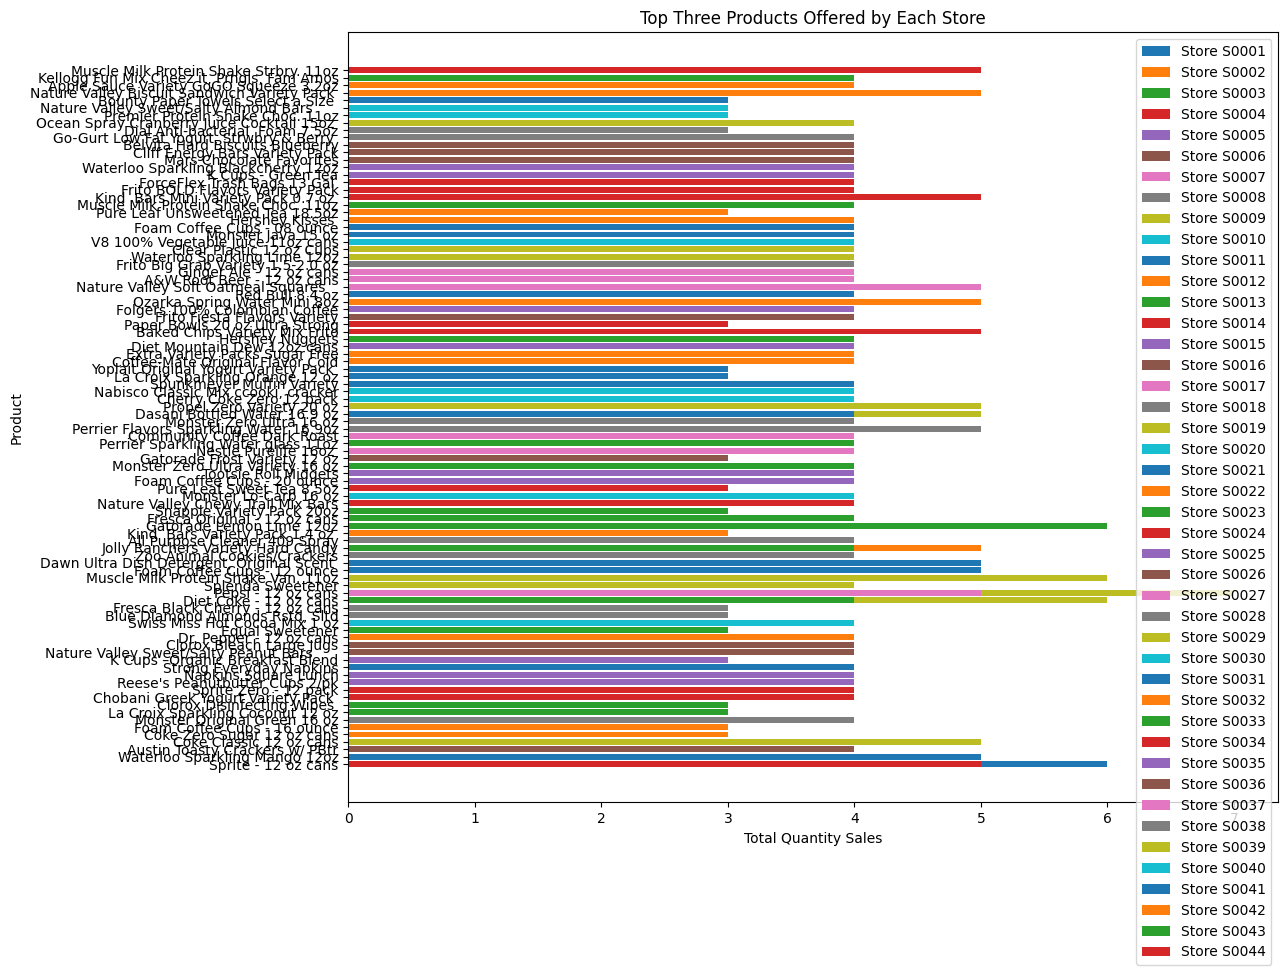

In [130]:
top_products_by_store = df.groupby('Store').apply(lambda group: group.nlargest(3, 'Total Quantity Sales')).reset_index(drop=True)

plt.figure(figsize=(12, 10))

for store, data in top_products_by_store.groupby('Store'):
    plt.barh(data['Product'], data['Total Quantity Sales'], label=f'Store {store}')

plt.xlabel('Total Quantity Sales')
plt.ylabel('Product')
plt.title('Top Three Products Offered by Each Store')
plt.legend()
plt.show()

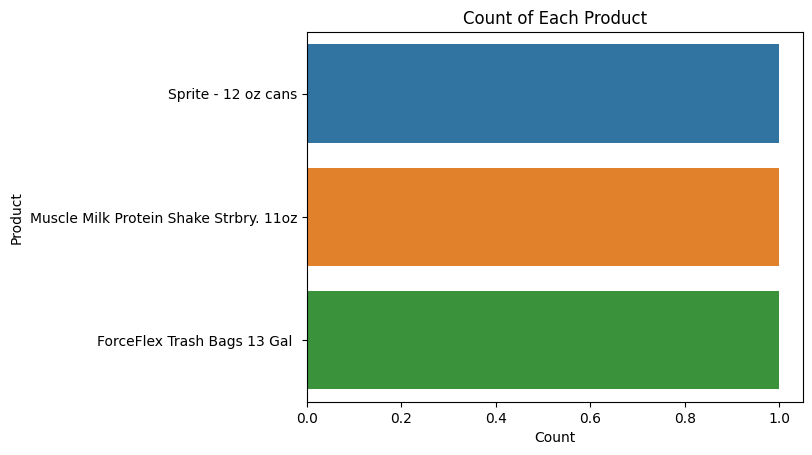

In [135]:
sns.countplot(y='Product', hue='Product', data=data)
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Count of Each Product')
plt.show()

### Q7: What products have been sold through card or mobile since X days?

    input: X = 400 days [use 400 or more days]

    output: [item1, item2, item3, ...........]

In [125]:
x=input("Enter number of days:" )

Enter number of days: 400


In [140]:
con = PostgresConnection().getConnection()
cur = con.cursor()

# Assuming x is defined as 400
x = 400

s1 = """
SELECT DISTINCT i.item_name
FROM ecomdb.fact_table f
JOIN ecomdb.trans_dim p ON f.payment_key = p.payment_key
JOIN ecomdb.item_dim i ON f.item_key = i.item_key
JOIN ecomdb.time_dim t ON f.time_key = t.time_key
WHERE t.date >= CURRENT_DATE - INTERVAL %s
"""
s2 = " AND p.trans_type = 'card'"

select_stmt = s1 + s2
cur.execute(select_stmt, (f"{x} days",))  # Use a tuple to pass parameters safely
records = cur.fetchall()


Connection to DB established!


In [143]:
item_names = [record[0] for record in records]

df = pd.DataFrame({'Item Name': item_names})
df

Item Name
0             Altoids Small Packs Variety
1   AquaFina Purified Drinking Water 16oz
2         Belvita Hard Biscuits Blueberry
3               Charmin Ultra Bath Tissue
4                Cherry Coke Zero 12 pack
..                                    ...
76               Vita Coconut Water 10oz 
77     Wint O Green LifeSavers Sugar Free
78        Wonderful Pistachios (in shell)
79  Yoplait Original Yogurt Variety Pack 
80            Zoo Animal Cookies/Crackers

[81 rows x 1 columns]

### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [152]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    item_name,
    quarter,
    total_sales
FROM (
    SELECT
        i.item_name,
        tdim.quarter,
        SUM(f.total_price) AS total_sales,
        ROW_NUMBER() OVER (PARTITION BY i.item_name ORDER BY SUM(f.total_price) ASC) AS sales_rank
    FROM
        ecomdb.fact_table f
    JOIN
        ecomdb.item_dim i ON f.item_key = i.item_key
    JOIN
        ecomdb.time_dim tdim ON f.time_key = tdim.time_key
    GROUP BY
        i.item_name, tdim.quarter
) ranked
WHERE sales_rank = 1;

"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [153]:
records

[('100% Juice Box Variety 6.75 oz ', 'Q4', 660.0),
 ('A&W Root Beer - 12 oz cans', 'Q3', 931.5),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', 202.5),
 ('Advil 2 pill packets', 'Q1', 2310.0),
 ('All Purpose Cleaner 409 Spray', 'Q3', 8028.0),
 ('Altoids Small Packs Variety', 'Q2', 600.0),
 ('Apple Sauce Variety GoGO Squeeze 3.2oz', 'Q4', 1134.0),
 ('AquaFina Purified Drinking Water 16oz', 'Q2', 1206.0),
 ('Austin Cookie Cracker Variety', 'Q1', 1568.0),
 ('Austin Toasty Crackers w/ PBtr', 'Q1', 1400.0),
 ('Baked Chips Variety Mix Frito', 'Q2', 2144.0),
 ("Barq's Root Beer - 12 oz cans", 'Q2', 290.25),
 ('Belvita Hard Biscuits Blueberry', 'Q3', 1001.0),
 ('Belvita Hard Biscuits Cinnamon', 'Q4', 234.0),
 ('Belvita Protein Oats Soft Biscuit', 'Q4', 462.0),
 ('Blue Diamond Almonds Rstd, Sltd', 'Q2', 114.0),
 ('Bounty Paper Towels Select a Size ', 'Q1', 1014.0),
 ('Breath Savers Peppermints 12/roll ', 'Q2', 800.0),
 ('Brisk Lemon Iced Tea - 12 oz cans', 'Q4', 1395.0),
 ('Cascade Gel Packs Dishwa

### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [158]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    i.item_name,
    s.division,
    SUM(f.total_price) AS total_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.item_dim i ON f.item_key = i.item_key
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
GROUP BY
    i.item_name, s.division
ORDER BY
    i.item_name, total_sales DESC;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [159]:
records

[('100% Juice Box Variety 6.75 oz ', 'Mymensingh', 1815.0),
 ('100% Juice Box Variety 6.75 oz ', 'Barishal', 1305.0),
 ('100% Juice Box Variety 6.75 oz ', 'Rajshahi', 1095.0),
 ('100% Juice Box Variety 6.75 oz ', 'Chittagong', 1005.0),
 ('100% Juice Box Variety 6.75 oz ', 'Dhaka', 960.0),
 ('100% Juice Box Variety 6.75 oz ', 'Rangpur', 705.0),
 ('100% Juice Box Variety 6.75 oz ', 'Khulna', 405.0),
 ('A&W Root Beer - 12 oz cans', 'Dhaka', 839.5),
 ('A&W Root Beer - 12 oz cans', 'Khulna', 793.5),
 ('A&W Root Beer - 12 oz cans', 'Chittagong', 713.0),
 ('A&W Root Beer - 12 oz cans', 'Barishal', 678.5),
 ('A&W Root Beer - 12 oz cans', 'Rangpur', 655.5),
 ('A&W Root Beer - 12 oz cans', 'Rajshahi', 644.0),
 ('A&W Root Beer - 12 oz cans', 'Mymensingh', 57.5),
 ('A&W Root Beer - 12 oz cans', 'Sylhet', 57.5),
 ('A&W Root Beer Diet - 12 oz cans', 'Dhaka', 472.5),
 ('A&W Root Beer Diet - 12 oz cans', 'Barishal', 256.5),
 ('A&W Root Beer Diet - 12 oz cans', 'Khulna', 216.0),
 ('A&W Root Beer Diet -

### Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

           s1-> M2 -> avg_sales

 

In [160]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    s.store_key,
    tdim.month,
    AVG(f.total_price) AS avg_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
GROUP BY
    s.store_key, tdim.month
ORDER BY
    s.store_key, tdim.month;

"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [161]:
records

[('S0001', 1, 1267.0),
 ('S0001', 2, 989.8947368421053),
 ('S0001', 3, 1337.8152173913043),
 ('S0001', 4, 707.6875),
 ('S0001', 5, 589.5875),
 ('S0001', 6, 545.0952380952381),
 ('S0001', 7, 1976.8695652173913),
 ('S0001', 8, 484.77941176470586),
 ('S0001', 9, 529.6057692307693),
 ('S0001', 10, 409.54761904761904),
 ('S0001', 11, 977.2894736842105),
 ('S0001', 12, 627.55),
 ('S0002', 1, 656.0131578947369),
 ('S0002', 2, 2013.0217391304348),
 ('S0002', 3, 5850.767857142857),
 ('S0002', 4, 1100.8636363636363),
 ('S0002', 5, 443.47),
 ('S0002', 6, 1632.6029411764705),
 ('S0002', 7, 995.2083333333334),
 ('S0002', 8, 549.52),
 ('S0002', 9, 268.5),
 ('S0002', 10, 1539.9772727272727),
 ('S0002', 11, 2249.9),
 ('S0002', 12, 175.1578947368421),
 ('S0003', 1, 1189.263888888889),
 ('S0003', 2, 891.5882352941177),
 ('S0003', 3, 494.36842105263156),
 ('S0003', 4, 1040.1),
 ('S0003', 5, 745.28125),
 ('S0003', 6, 1331.7375),
 ('S0003', 7, 2138.0),
 ('S0003', 8, 2408.1184210526317),
 ('S0003', 9, 1464.

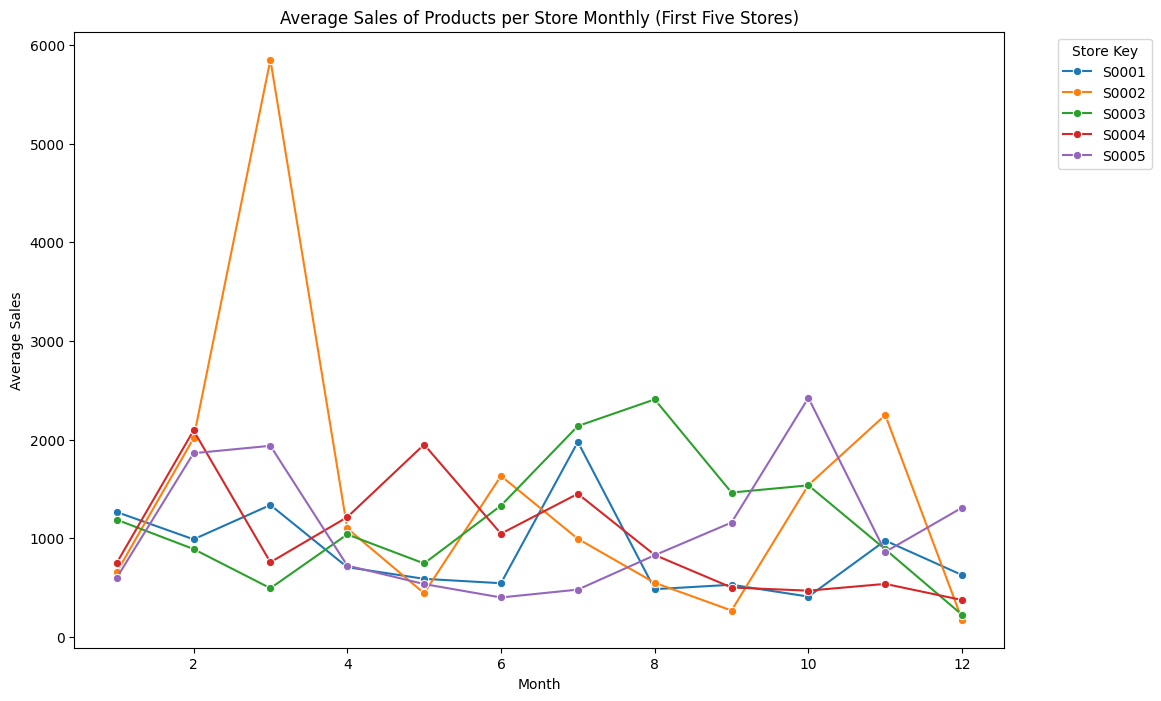

In [163]:

columns = ['store_key', 'month', 'avg_sales']
df = pd.DataFrame(records, columns=columns)

first_five_stores = df[df['store_key'].isin(df['store_key'].unique()[:5])]

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='avg_sales', hue='store_key', data=first_five_stores, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales of Products per Store Monthly (First Five Stores)')
plt.legend(title='Store Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 1.store and time dimensional financial analytics.

##### By query 1 and 2 we can see the sales of the stores and filter out which store have best selling product so that others stores can be baneficial from them cause if we know the product is sale most they also can provide that to other stores


## Query-1  Compare the sales performance of different stores in the last year.(2022)


In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    s.store_key,
    SUM(f.total_price) AS total_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
WHERE
    tdim.year = 2022
GROUP BY
    s.store_key
ORDER BY
    total_sales DESC;
"""
cur.execute(select_stmt)
records = cur.fetchall()

Connection to DB established!


C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_2784\3806986092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Store', data=df, palette='viridis')


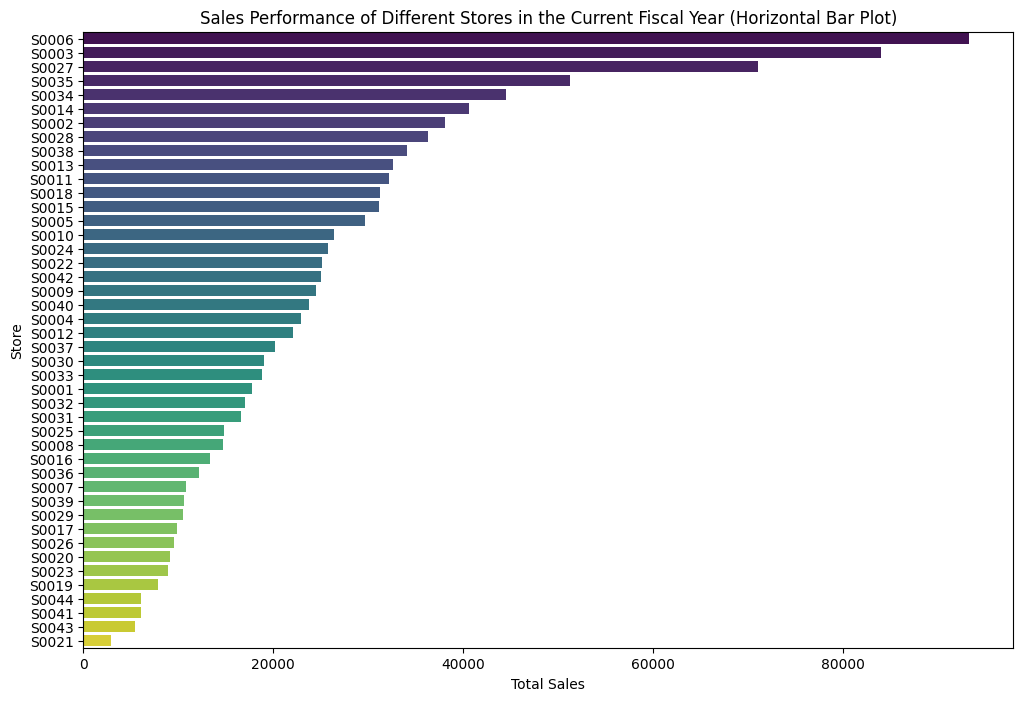

In [14]:
df = pd.DataFrame(records, columns=['Store', 'Total Sales'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Sales', y='Store', data=df, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Store')
plt.title('Sales Performance of Different Stores in the Last Year')
plt.show()

## Query-2 :Find the sales trend for the top 3 stores over the last year.

In [15]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
WITH ranked_stores AS (
    SELECT
        s.store_key,
        SUM(f.total_price) AS total_sales
    FROM
        ecomdb.fact_table f
    JOIN
        ecomdb.store_dim s ON f.store_key = s.store_key
    JOIN
        ecomdb.time_dim tdim ON f.time_key = tdim.time_key
    WHERE
        tdim.year = EXTRACT(YEAR FROM CURRENT_DATE) - 1
    GROUP BY
        s.store_key
    ORDER BY
        total_sales DESC
    LIMIT 3
)
SELECT
    s.store_key,
    tdim.month,
    SUM(f.total_price) AS monthly_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
JOIN
    ranked_stores rs ON s.store_key = rs.store_key
GROUP BY
    s.store_key, tdim.month
ORDER BY
    s.store_key, tdim.month;

"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


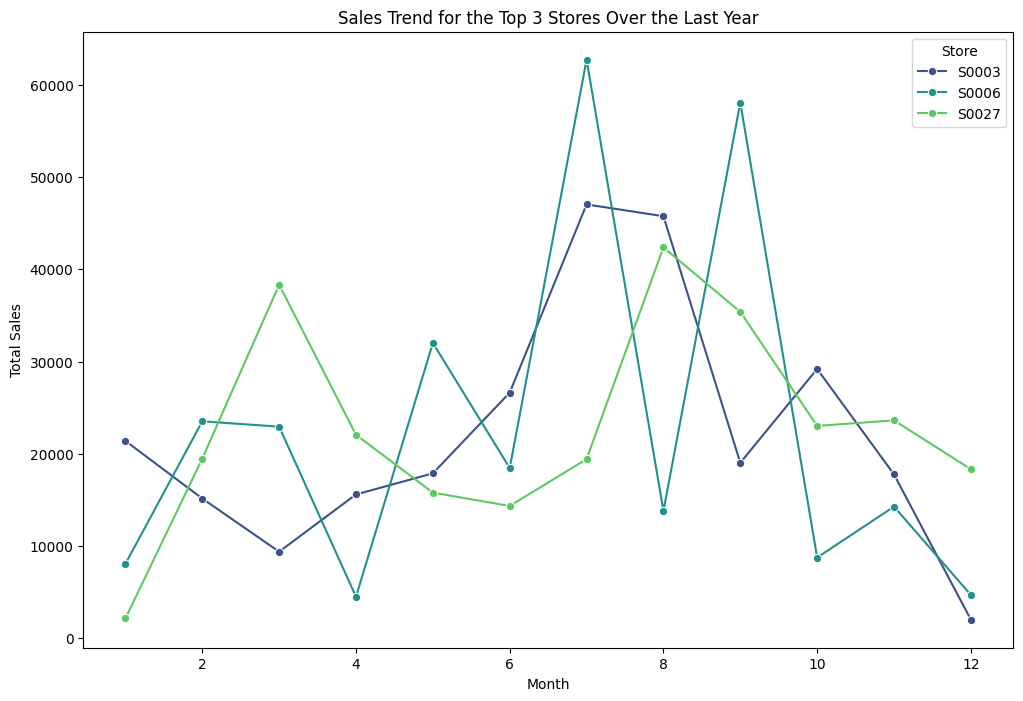

In [16]:
df = pd.DataFrame(records, columns=['Store', 'Month', 'Total Sales'])

# Get the top 3 stores
top_stores = df.groupby('Store')['Total Sales'].sum().nlargest(3).index

df_top3 = df[df['Store'].isin(top_stores)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Sales', hue='Store', data=df_top3, palette='viridis', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend for the Top 3 Stores Over the Last Year')
plt.legend(title='Store')
plt.show()

# 2. customer and time dimensional financial analytics.
#### By query 1 and 2 we can analyse which customer in which time buy things and we can give them offer for that. we can also analyse which product is most buying that time by a customer

## Query 1: What is the average transaction amount for each customer in the last month?

In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    c.customer_key,
    AVG(f.total_price) AS avg_transaction_amount
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.customer_dim c ON f.customer_key = c.customer_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
WHERE
    EXTRACT(MONTH FROM tdim.date) = EXTRACT(MONTH FROM CURRENT_DATE) - 1
GROUP BY
    c.customer_key;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


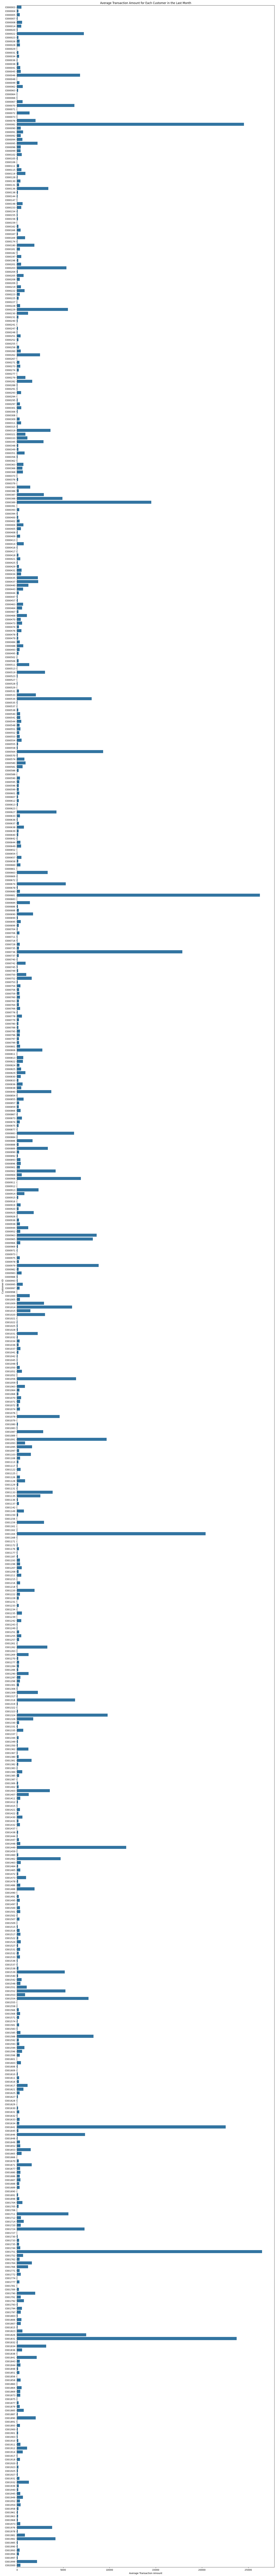

In [27]:
df = pd.DataFrame(records, columns=['Customer ID', 'Average Transaction Amount'])

plt.figure(figsize=(20, 200))
sns.barplot(x='Average Transaction Amount', y='Customer ID', data=df, orient='h')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Customer ID')
plt.title('Average Transaction Amount for Each Customer in the Last Month')
plt.show()

## Query 2: Identify the top 5 customers with the highest total sales.ql

In [29]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    c.name,
    SUM(f.total_price) AS total_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.customer_dim c ON f.customer_key = c.customer_key
GROUP BY
    c.customer_key
ORDER BY
    total_sales DESC
LIMIT 5;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_2784\3303056648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df['Total Sales'], y=df['Customer ID'], palette='deep')


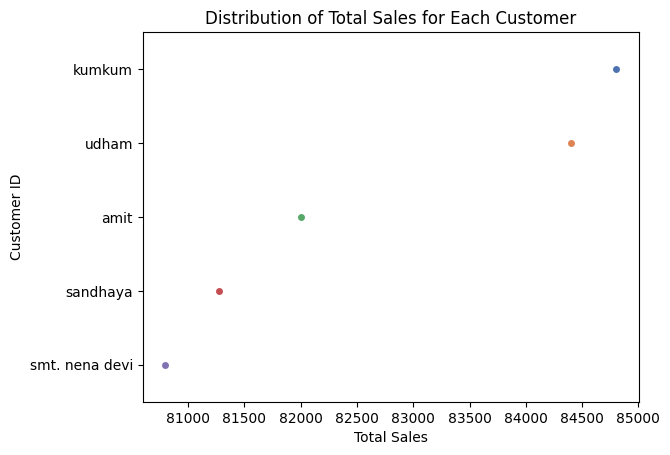

In [36]:
df = pd.DataFrame(records, columns=['Customer ID', 'Total Sales'])
sns.swarmplot(x=df['Total Sales'], y=df['Customer ID'], palette='deep')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.title('Distribution of Total Sales for Each Customer')
plt.show()

# 3. item and time dimensional financial analytics.
 #### By query 1 and 2 we can analyse which product is more buy by the customers in recent days and which are not at all selling by the stores so that the store can now dont stock them and they dont face any loss for them

## Query 1:Find the total sales for each item in the last year.

In [37]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    i.item_name,
    SUM(f.total_price) AS total_sales
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.item_dim i ON f.item_key = i.item_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
WHERE
    tdim.year = 2022
GROUP BY
    i.item_name
ORDER BY
    total_sales DESC;



"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_2784\3491533480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='item_name', data=df, palette='viridis')


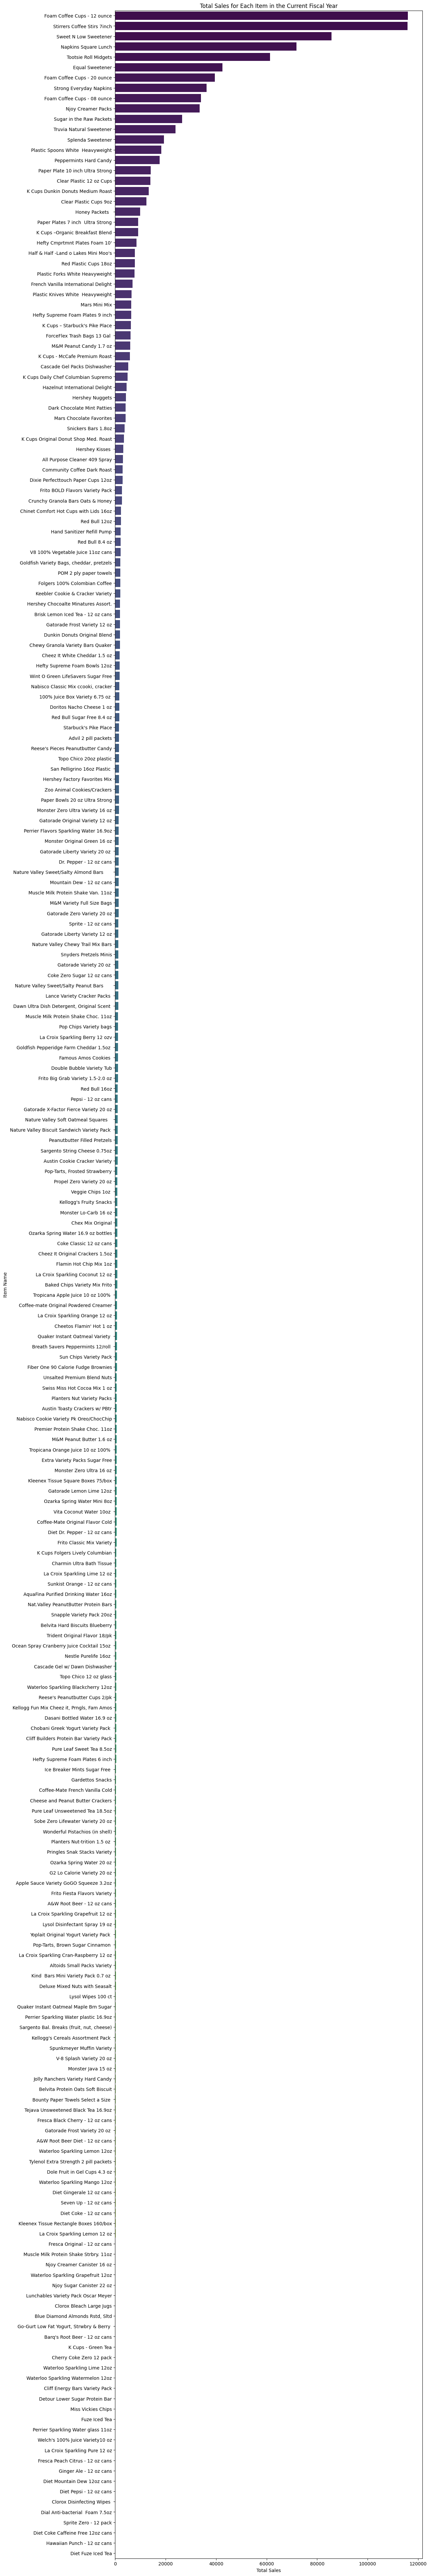

In [41]:
                    
df = pd.DataFrame(records, columns=['item_name', 'total_sales'])

plt.figure(figsize=(12, 100))
sns.barplot(x='total_sales', y='item_name', data=df, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Item Name')
plt.title('Total Sales for Each Item in the Current Fiscal Year')
plt.show()


## Qeury 2: Find the quarterly percentage change in sales for each item compared to the previous quarter.

In [43]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
WITH QuarterlySales AS (
    SELECT
        i.item_name,
        tdim.quarter,
        SUM(f.total_price) AS total_sales
    FROM
        ecomdb.fact_table f
    JOIN
        ecomdb.item_dim i ON f.item_key = i.item_key
    JOIN
        ecomdb.time_dim tdim ON f.time_key = tdim.time_key
    GROUP BY
        i.item_name, tdim.quarter
)

SELECT
    item_name,
    quarter,
    total_sales,
    LAG(total_sales) OVER (PARTITION BY item_name ORDER BY quarter) AS prev_quarter_sales,
    CASE
        WHEN LAG(total_sales) OVER (PARTITION BY item_name ORDER BY quarter) = 0 THEN NULL
        ELSE ((total_sales - LAG(total_sales) OVER (PARTITION BY item_name ORDER BY quarter)) / LAG(total_sales) OVER (PARTITION BY item_name ORDER BY quarter)) * 100
    END AS sales_percentage_change
FROM
    QuarterlySales;



"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_2784\2416021708.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


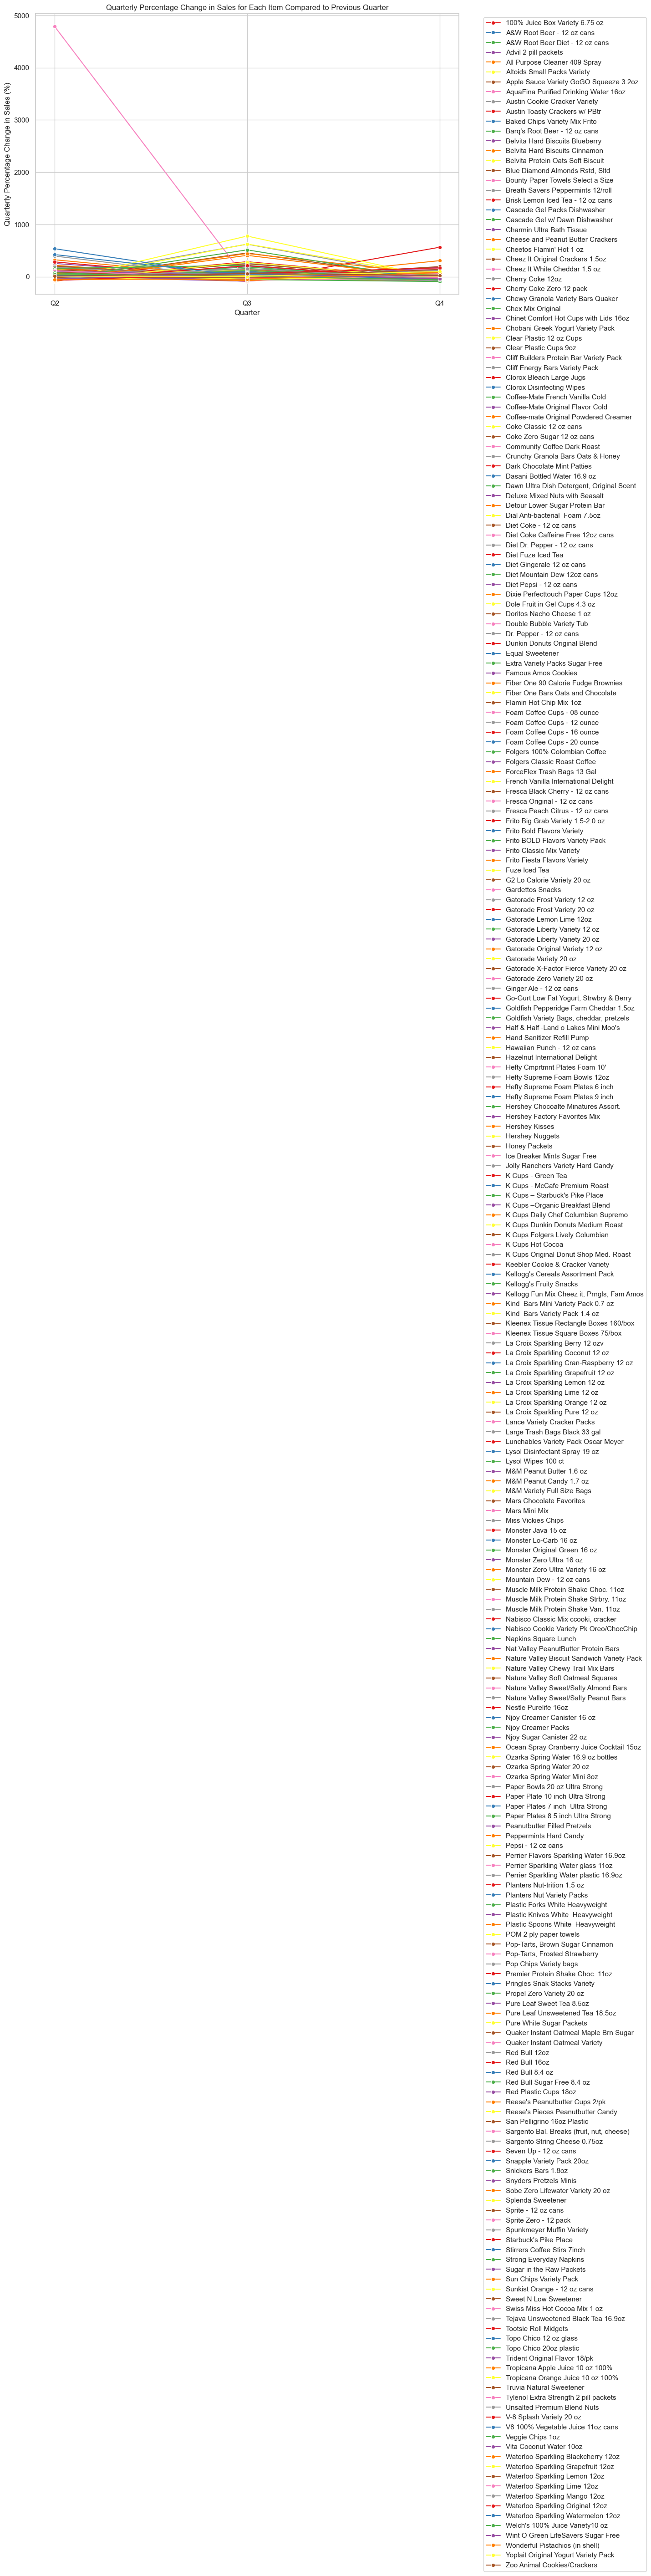

In [58]:
 df = pd.DataFrame(records, columns=['item_name', 'quarter', 'total_sales', 'prev_quarter_sales', 'sales_percentage_change'])

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(x='quarter', y='sales_percentage_change', hue='item_name', marker='o', data=df, palette='Set1')
plt.xlabel('Quarter')
plt.ylabel('Quarterly Percentage Change in Sales (%)')
plt.title('Quarterly Percentage Change in Sales for Each Item Compared to Previous Quarter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. store and time dimensional inventory analytics.
 #### By query 1 and 2 we can analyse the store's quarterly inventory and yearly inventory sell so that from we can analyse that the customers need and the best seeling products also

 ## Query 1: What is the total value of inventory for each store in each quarter?

In [62]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    s.store_key,
    tdim.quarter,
    SUM(f.unit_price * f.quantity) AS total_inventory_value
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
GROUP BY
    s.store_key, tdim.quarter;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [63]:
records

[('S0003', 'Q3', 111822.75),
 ('S0024', 'Q4', 31397.5),
 ('S0042', 'Q2', 53173.25),
 ('S0043', 'Q1', 167555.0),
 ('S0008', 'Q2', 55975.75),
 ('S0009', 'Q3', 48395.5),
 ('S0007', 'Q2', 61669.0),
 ('S0003', 'Q1', 45956.75),
 ('S0001', 'Q2', 34561.75),
 ('S0005', 'Q4', 96870.0),
 ('S0011', 'Q2', 94463.0),
 ('S0022', 'Q2', 71502.5),
 ('S0025', 'Q2', 117636.0),
 ('S0028', 'Q1', 58087.25),
 ('S0002', 'Q1', 140674.5),
 ('S0038', 'Q2', 75587.5),
 ('S0040', 'Q3', 70063.75),
 ('S0003', 'Q2', 60123.0),
 ('S0018', 'Q1', 82778.5),
 ('S0040', 'Q4', 54395.25),
 ('S0044', 'Q2', 31867.0),
 ('S0001', 'Q3', 67479.0),
 ('S0006', 'Q2', 54992.0),
 ('S0023', 'Q1', 66494.25),
 ('S0027', 'Q2', 52214.25),
 ('S0015', 'Q2', 86724.5),
 ('S0009', 'Q1', 92755.25),
 ('S0020', 'Q3', 36149.0),
 ('S0017', 'Q3', 27974.75),
 ('S0021', 'Q3', 34994.0),
 ('S0020', 'Q2', 36351.25),
 ('S0020', 'Q1', 34140.25),
 ('S0008', 'Q4', 59771.5),
 ('S0038', 'Q3', 78423.0),
 ('S0032', 'Q2', 56298.0),
 ('S0027', 'Q4', 64994.25),
 ('S0022'

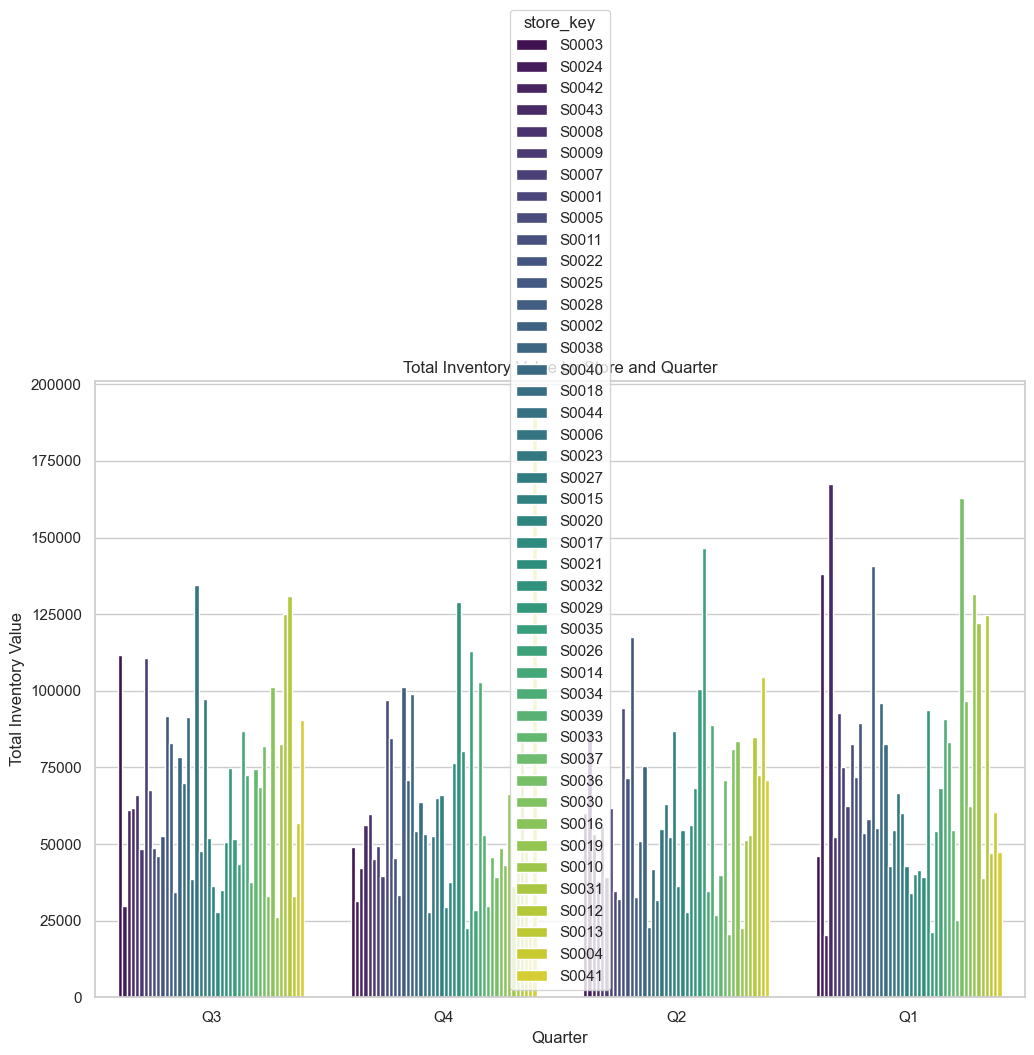

In [69]:
df = pd.DataFrame(records, columns=['store_key','quarter','total_inventory_value'])

plt.figure(figsize=(12, 8))
sns.barplot(x='quarter', y='total_inventory_value', hue='store_key', data=df, palette='viridis')
plt.xlabel('Quarter')
plt.ylabel('Total Inventory Value')
plt.title('Total Inventory Value by Store and Quarter')
plt.show()

## Query 2 : Calculate the inventory turnover ratio for each store year  wise

In [5]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    s.store_key,
    tdim.year,
    (SUM(f.total_price) / AVG(f.unit_price * f.quantity)) AS inventory_turnover_ratio
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.store_dim s ON f.store_key = s.store_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
GROUP BY
    s.store_key, tdim.year, tdim.quarter
ORDER BY
    s.store_key, tdim.year;
"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [94]:
records

[('S0001', 2014, 10.0),
 ('S0001', 2014, 6.0),
 ('S0001', 2014, 4.0),
 ('S0001', 2014, 6.0),
 ('S0001', 2015, 5.0),
 ('S0001', 2015, 12.0),
 ('S0001', 2015, 5.0),
 ('S0001', 2015, 7.0),
 ('S0001', 2016, 5.0),
 ('S0001', 2016, 10.0),
 ('S0001', 2016, 10.0),
 ('S0001', 2016, 8.0),
 ('S0001', 2017, 8.0),
 ('S0001', 2017, 4.0),
 ('S0001', 2017, 12.0),
 ('S0001', 2017, 12.0),
 ('S0001', 2018, 6.0),
 ('S0001', 2018, 6.0),
 ('S0001', 2018, 8.0),
 ('S0001', 2018, 6.0),
 ('S0001', 2019, 6.0),
 ('S0001', 2019, 5.0),
 ('S0001', 2019, 6.0),
 ('S0001', 2019, 9.0),
 ('S0001', 2020, 10.0),
 ('S0001', 2020, 5.0),
 ('S0001', 2020, 7.000000000000001),
 ('S0001', 2020, 2.0),
 ('S0001', 2021, 3.0),
 ('S0001', 2021, 9.0),
 ('S0001', 2021, 9.0),
 ('S0001', 2021, 2.0),
 ('S0001', 2022, 1.0),
 ('S0001', 2022, 4.0),
 ('S0001', 2022, 3.0),
 ('S0001', 2022, 4.0),
 ('S0002', 2014, 3.0),
 ('S0002', 2014, 5.0),
 ('S0002', 2014, 9.0),
 ('S0002', 2014, 3.0),
 ('S0002', 2015, 7.0),
 ('S0002', 2015, 5.0),
 ('S0002', 20

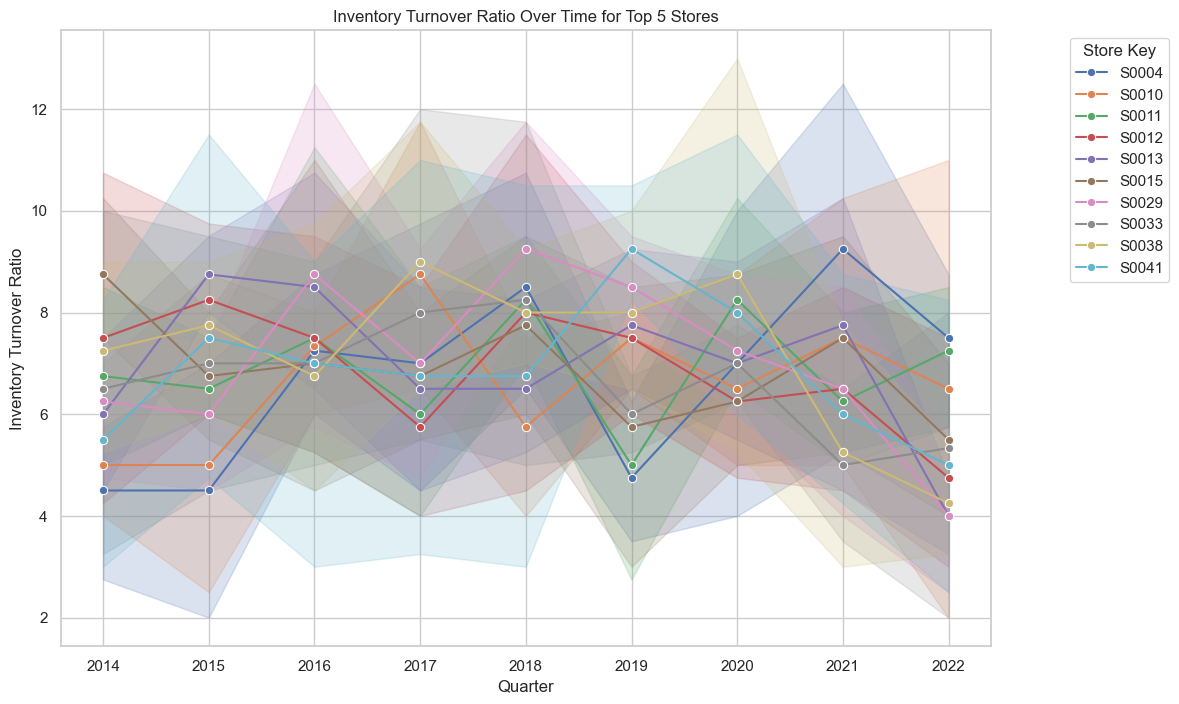

In [95]:
avg_ratios = df.groupby('store_key')['inventory_turnover_ratio'].mean()

top_stores = avg_ratios.nlargest(5).index

df_top5 = df[df['store_key'].isin(top_stores)]

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top10, x='year', y='inventory_turnover_ratio', hue='store_key', marker='o')
plt.title('Inventory Turnover Ratio Over Time for Top 5 Stores')
plt.xlabel('Quarter')
plt.ylabel('Inventory Turnover Ratio')
plt.legend(title='Store Key', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


# 5. item and time dimensional inventory analytics
 ## By the query 1 and 2 we can see the values of the items increseas r decreased yearly and quarter. it will guve a knowledge to have profit margin we can get by selling those product also

## Query 1 :Find the total inventory value for each item in the last quarter

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    i.item_name,
    tdim.quarter,
    SUM(f.unit_price * f.quantity) AS total_inventory_value
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.item_dim i ON f.item_key = i.item_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
WHERE
    tdim.quarter = (SELECT MAX(quarter) FROM ecomdb.time_dim)
GROUP BY
    i.item_name, tdim.quarter;

"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [7]:
records

[('Gatorade Liberty Variety 20 oz ', 'Q4', 1240.0),
 ('Hazelnut International Delight', 'Q4', 13080.0),
 ('Topo Chico 12 oz glass', 'Q4', 2576.0),
 ('Hefty Supreme Foam Plates 9 inch', 'Q4', 18768.0),
 ('Cheez It Original Crackers 1.5oz', 'Q4', 5025.0),
 ('La Croix Sparkling Orange 12 oz', 'Q4', 1552.0),
 ('Dasani Bottled Water 16.9 oz', 'Q4', 1251.0),
 ('Cliff Energy Bars Variety Pack', 'Q4', 1752.0),
 ('Foam Coffee Cups - 12 ounce', 'Q4', 125152.0),
 ('Belvita Hard Biscuits Cinnamon', 'Q4', 234.0),
 ('Diet Coke Caffeine Free 12oz cans', 'Q4', 459.0),
 ('Bounty Paper Towels Select a Size ', 'Q4', 2548.0),
 ('Clorox Disinfecting Wipes ', 'Q4', 565.5),
 ('Monster Zero Ultra 16 oz', 'Q4', 6240.0),
 ('Belvita Protein Oats Soft Biscuit', 'Q4', 462.0),
 ('Fresca Black Cherry - 12 oz cans', 'Q4', 472.5),
 ('Pop-Tarts, Frosted Strawberry', 'Q4', 2496.0),
 ('Fresca Peach Citrus - 12 oz cans', 'Q4', 330.75),
 ('Napkins Square Lunch', 'Q4', 138375.0),
 ('La Croix Sparkling Berry 12 ozv', 'Q4', 2

C:\Users\BUSHRA\AppData\Local\Temp\ipykernel_12168\3265016735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_inventory_value', y='item_name', data=df, palette='viridis')


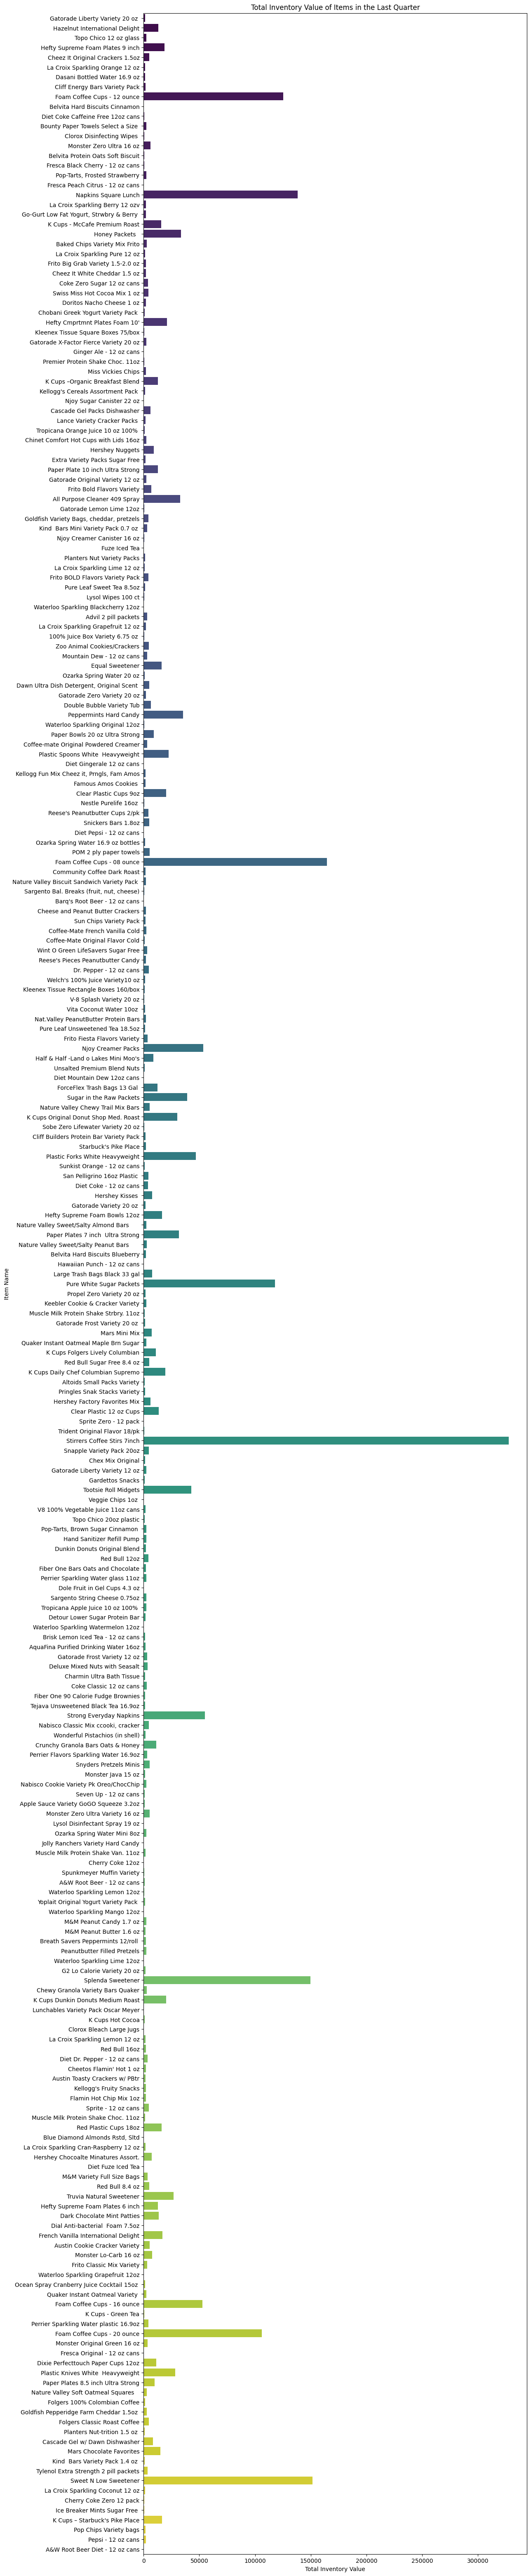

In [23]:
df = pd.DataFrame(records, columns=['item_name','quater','total_inventory_value'])

plt.figure(figsize=(12, 80))
sns.barplot(x='total_inventory_value', y='item_name', data=df, palette='viridis')
plt.xlabel('Total Inventory Value')
plt.ylabel('Item Name')
plt.title('Total Inventory Value of Items in the Last Quarter')
plt.show()

## Query 2: :Calculate the average unit price for each item in the last quarter.

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = """
SELECT
    i.item_name,
    AVG(f.unit_price) AS avg_unit_price
FROM
    ecomdb.fact_table f
JOIN
    ecomdb.item_dim i ON f.item_key = i.item_key
JOIN
    ecomdb.time_dim tdim ON f.time_key = tdim.time_key
WHERE
    tdim.quarter = (SELECT MAX(quarter) FROM ecomdb.time_dim)
GROUP BY
    i.item_name;


"""
cur.execute(select_stmt)
records = cur.fetchall()



Connection to DB established!


In [41]:
records

[('Gatorade Liberty Variety 20 oz ', 20.0),
 ('Hazelnut International Delight', 15.0),
 ('Topo Chico 12 oz glass', 28.0),
 ('Hefty Supreme Foam Plates 9 inch', 16.0),
 ('Cheez It Original Crackers 1.5oz', 15.0),
 ('La Croix Sparkling Orange 12 oz', 16.0),
 ('Dasani Bottled Water 16.9 oz', 9.0),
 ('Cliff Energy Bars Variety Pack', 24.0),
 ('Foam Coffee Cups - 12 ounce', 32.0),
 ('Belvita Hard Biscuits Cinnamon', 13.0),
 ('Diet Coke Caffeine Free 12oz cans', 6.75),
 ('Bounty Paper Towels Select a Size ', 26.0),
 ('Clorox Disinfecting Wipes ', 19.5),
 ('Monster Zero Ultra 16 oz', 40.0),
 ('Belvita Protein Oats Soft Biscuit', 14.0),
 ('Fresca Black Cherry - 12 oz cans', 6.75),
 ('Pop-Tarts, Frosted Strawberry', 12.0),
 ('Fresca Peach Citrus - 12 oz cans', 6.75),
 ('Napkins Square Lunch', 15.0),
 ('La Croix Sparkling Berry 12 ozv', 16.0),
 ('Go-Gurt Low Fat Yogurt, Strwbry & Berry ', 12.0),
 ('K Cups - McCafe Premium Roast', 42.0),
 ('Honey Packets  ', 45.0),
 ('Baked Chips Variety Mix Frit

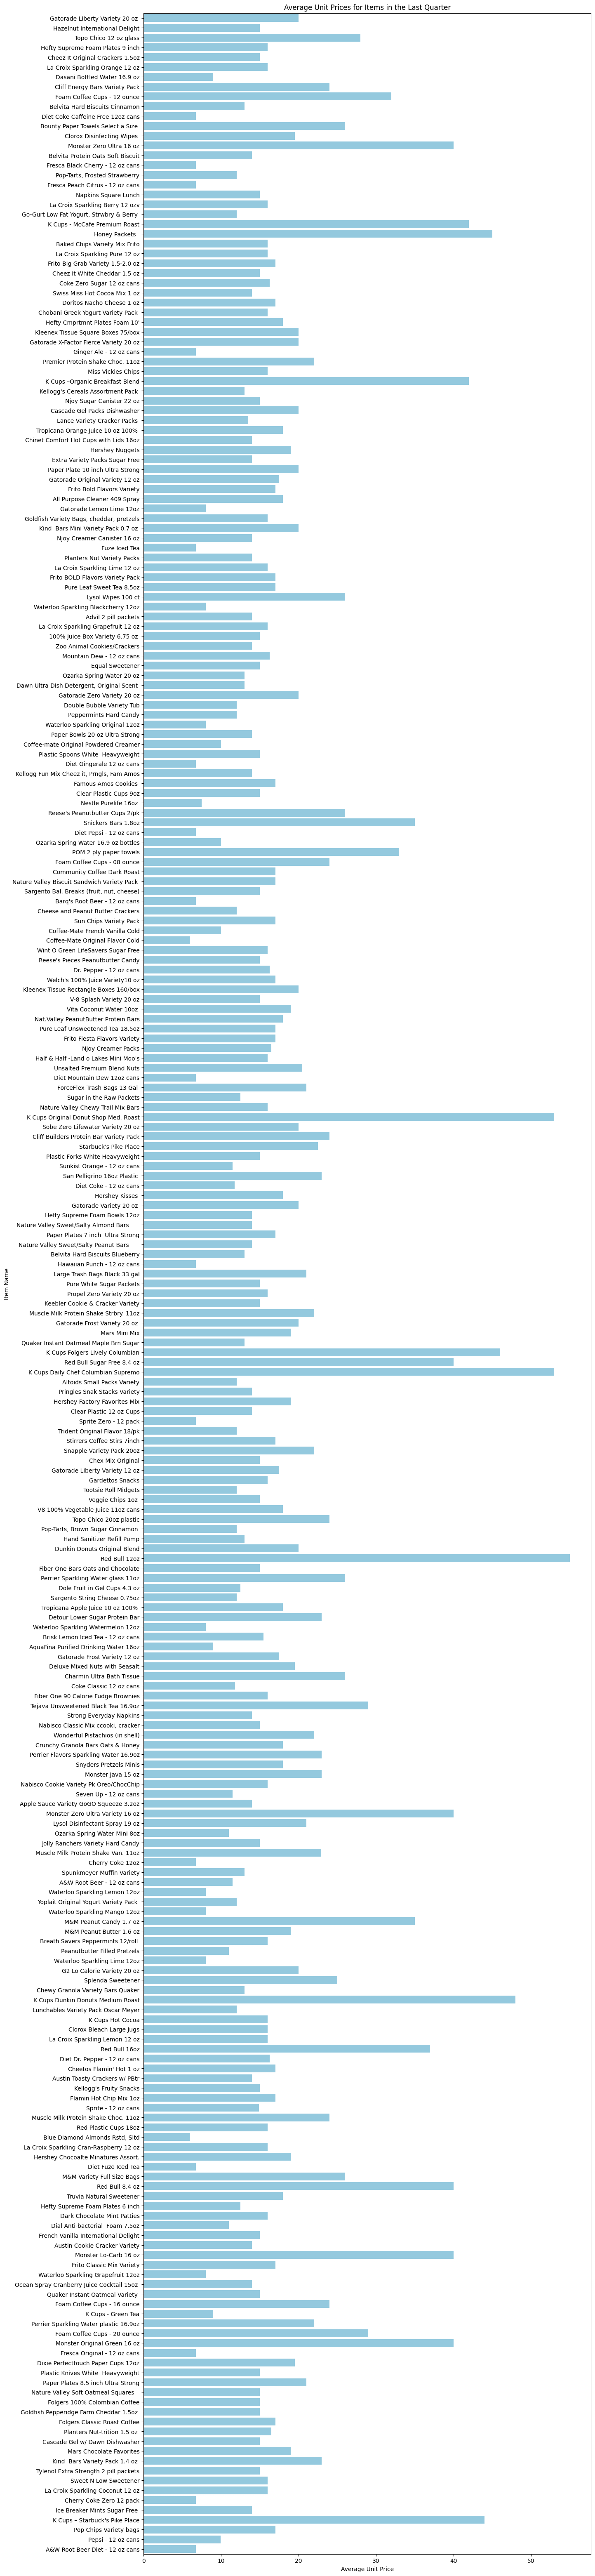

In [46]:
columns = ['item_name', 'avg_unit_price']
df = pd.DataFrame(records, columns=columns)

plt.figure(figsize=(14, 80))
sns.barplot(x='avg_unit_price', y='item_name', data=df, color='skyblue')
plt.xlabel('Average Unit Price')
plt.ylabel('Item Name')
plt.title('Average Unit Prices for Items in the Last Quarter')
plt.show()

ValueError: 4 columns passed, passed data had 3 columns